In [103]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import linear_model
import os

In [104]:
import numpy as np
from PIL import Image 
from skimage.io import imread
from skimage.transform import resize
def loadDigitData():

    images = []
    labels = []

    limit = 100

    dir = "data/train/"
    count = 1
    for file in os.listdir(dir):
        img = imread(dir + file)
        img = resize(img, (16, 16))

        images.append(img)
        labels.append(0)

        if count >= limit: break
        count += 1

    dir = "data/train_sepia/"
    count = 1
    for file in os.listdir(dir):
        img = imread(dir + file)
        img = resize(img, (16, 16))

        images.append(img)
        labels.append(1)

        if count >= limit: break
        count += 1

    inputs = np.asarray(images)
    outputs = np.asarray(labels)

    noData = len(inputs)
    permutation = np.random.permutation(noData)
    inputs = inputs[permutation]
    outputs = outputs[permutation]

    return inputs, outputs

inputs, outputs = loadDigitData()
outputNames = [0, 1]

In [105]:
def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return trainInputs, trainOutputs, testInputs, testOutputs

In [106]:
def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools 

    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

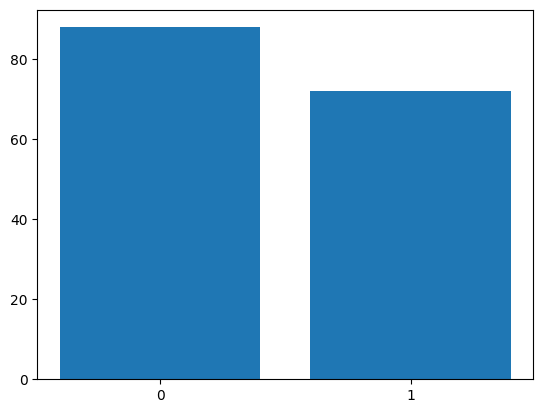

In [107]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
bins = range(3)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), outputNames)
plt.show()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 14, 14, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,690 (1.20 MB)

 Trainable params: 314,690 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5832 - loss: 0.6930
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6201 - loss: 0.6729
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6148 - loss: 0.6726
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6256 - loss: 0.6458
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7407 - loss: 0.5894
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.6128
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9055 - loss: 0.5368
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8041 - loss: 0.4974
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9503 - loss: 0.4119
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9586 - loss: 0.3472
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9628 - loss: 0.3508
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9670 - lo

Text(0, 0.5, 'Loss & acc')

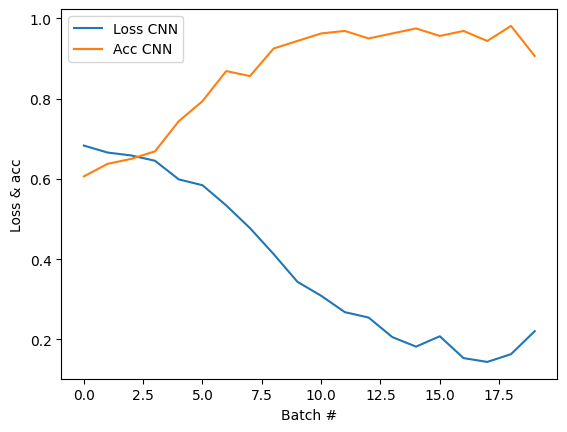

In [108]:
# classifier = neural_network.MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.01)
# classifier.classes_ = outputNames
# classifier.fit(trainInputs, trainOutputs)

# predictedLabels = classifier.predict(testInputs)

import tensorflow as tf

trainInputs = np.array(trainInputs)
trainOutputs = tf.keras.utils.to_categorical(np.array(trainOutputs))

model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(16, 16, 3)),
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = model.fit(trainInputs, trainOutputs, batch_size=16, epochs=20)

import matplotlib.pyplot as plt

loss, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss, (loss, acc)], ['Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 14, 14, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 5, 5, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,378 (364.76 KB)

 Trainable params: 93,378 (364.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 0.6861  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.6624 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.6486 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9257 - loss: 0.6231 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8896 - loss: 0.5868 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9504 - loss: 0.5443 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8993 - loss: 0.5033 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.4373 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.3845 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8445 - loss: 0.3950 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.2616 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

Text(0, 0.5, 'Loss & acc')

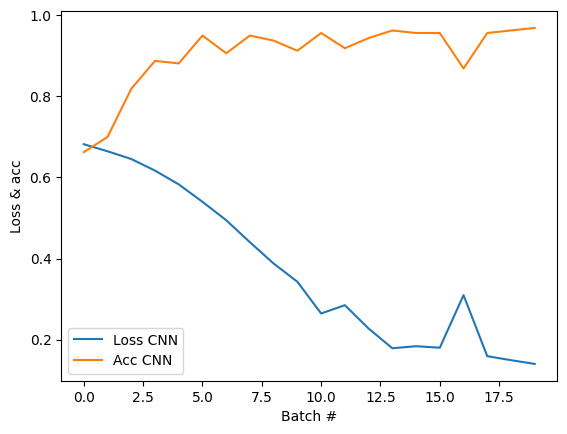

In [109]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = model.fit(trainInputs, trainOutputs, batch_size=16, epochs=20)

import matplotlib.pyplot as plt

loss, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss, (loss, acc)], ['Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 14, 14, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 5, 5, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,538 (381.01 KB)

 Trainable params: 97,538 (381.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4037 - loss: 0.6946  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5399 - loss: 0.6917 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7346 - loss: 0.6876 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6786 - loss: 0.6860 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7647 - loss: 0.6822 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7784 - loss: 0.6816 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7446 - loss: 0.6796 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7493 - loss: 0.6759 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8155 - loss: 0.6726 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7979 - loss: 0.6683 


Text(0, 0.5, 'Loss & acc')

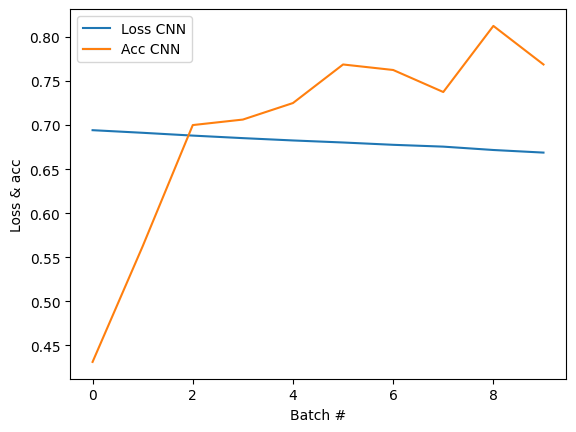

In [113]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.CategoricalCrossentropy(),
               metrics=['accuracy'])

historyCNN = model.fit(trainInputs, trainOutputs, batch_size=32, epochs=10)

import matplotlib.pyplot as plt

loss, = plt.plot(historyCNN.history['loss'], label = 'loss CNN')
acc, = plt.plot(historyCNN.history['accuracy'], label = 'acc CNN')
plt.legend([loss, (loss, acc)], ['Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')